# Benchmark with SNN libraries

This benchmark superficially compares the performance of the spiking neural network libraries Norse and BindsNet. The purpose of the benchmark is not to establish superiority of any kind, but to prove that the Norse library is at least provides competitive performance to BindsNet.

As always, we strive to provide open and reproducible code. This notebook is also accessible via Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/norse/norse/blob/master/notebooks/benchmark_SNN.ipynb)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

!pip install --no-cache-dir -e ~/workspace/norse/norse
#!pip install -qU git+https://github.com/BindsNET/bindsnet

Obtaining file:///home/jens/workspace/norse/norse
  Found existing installation: norse 0.0.2
    Uninstalling norse-0.0.2:
      Successfully uninstalled norse-0.0.2
  Running setup.py develop for norse


In [2]:
from norse.torch.benchmark import benchmark
import norse.torch.benchmark.lif as norse_lif

In [7]:
norse_cpu_lif = benchmark(norse_lif.lif_benchmark, ["input_features", "output_features"], range(10, 101), device="cpu")
norse_gpu_lif = benchmark(norse_lif.lif_benchmark, ["input_features", "output_features"], range(10, 101), device="cuda")

In [4]:
norse_cpu_lif_ff = benchmark(norse_lif.lif_feed_forward_benchmark, ["input_features", "output_features"], range(10, 101), device="cpu")
norse_gpu_lif_ff = benchmark(norse_lif.lif_feed_forward_benchmark, ["input_features", "output_features"], range(10, 101), device="cuda")

NameError: name 'norse_gpu_lif' is not defined

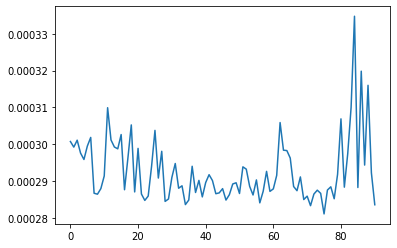

In [5]:
plt.plot(list(norse_cpu_lif.values()))
plt.plot(list(norse_gpu_lif.values()))

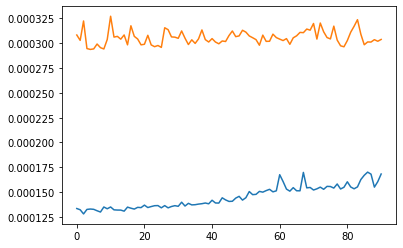

In [11]:
plt.plot(list(norse_cpu_lif_ff.values()))
plt.plot(list(norse_gpu_lif_ff.values()))

In [ ]:
from bindsnet.network import Network
from bindsnet.network.topology import Connection
from bindsnet.network.nodes import Input, LIFNodes

def BindsNET_cpu(n_neurons, time):
    t0 = t()

    torch.set_default_tensor_type("torch.FloatTensor")

    t1 = t()

    network = Network()
    network.add_layer(Input(n=n_neurons), name="X")
    network.add_layer(LIFNodes(n=n_neurons), name="Y")
    network.add_connection(
        Connection(source=network.layers["X"], target=network.layers["Y"]),
        source="X",
        target="Y",
    )

    data = {"X": poisson(datum=torch.rand(n_neurons), time=time)}
    network.run(inputs=data, time=time)

    return t() - t0, t() - t1

In [ ]:
def BindsNET_gpu(n_neurons, time):
    if torch.cuda.is_available():
        t0 = t()

        torch.set_default_tensor_type("torch.cuda.FloatTensor")

        t1 = t()

        network = Network()
        network.add_layer(Input(n=n_neurons), name="X")
        network.add_layer(LIFNodes(n=n_neurons), name="Y")
        network.add_connection(
            Connection(source=network.layers["X"], target=network.layers["Y"]),
            source="X",
            target="Y",
        )

        data = {"X": poisson(datum=torch.rand(n_neurons), time=time)}
        network.run(inputs=data, time=time)

        return t() - t0, t() - t1